# MRMC Demo on Synthetic Data

In [1]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..'))

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from recourse_methods import mrmc_method
from core import recourse_iterator
from data import data_adapter as da
from models.synthetic import SyntheticModel
from core import utils
from visualize.two_d_plots import Display2DPaths

## Load the data and model

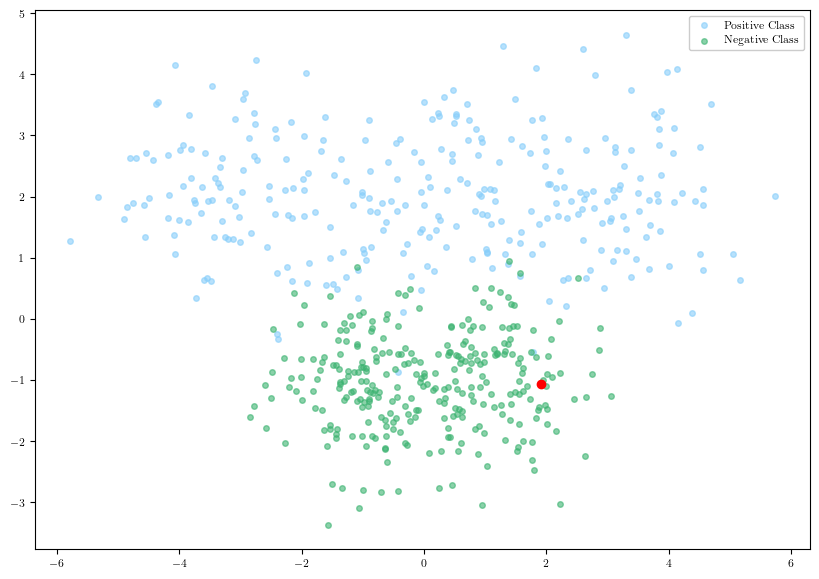

In [2]:
dataset, preprocessor = da.load_synthetic_dataset()
model = SyntheticModel(0.2, 0.5)
poi = utils.random_poi(dataset)

fig, ax = Display2DPaths(
    dataset.drop('Y', axis=1).to_numpy(),
    dataset['Y'].to_numpy()
).use_small_legend().set_poi(poi).scatter()

## Generate some recourse directions

          x         y
0  0.105182  0.296523
1 -0.140764  0.086557
2 -0.143882  0.237268
[0.99941726 0.99999287 0.99999785]


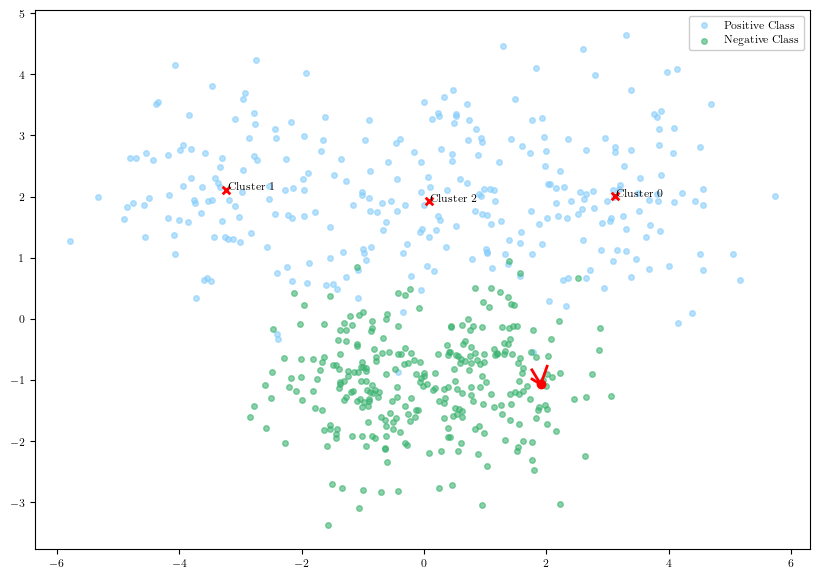

In [3]:
k_directions = 3
mrmc = mrmc_method.MRMC(
    k_directions,
    preprocessor,
    dataset,
    rescale_direction=mrmc_method.normalize_rescaler)

dirs = mrmc.get_all_recourse_directions(preprocessor.transform_series(poi))
print(dirs)
fig, ax = Display2DPaths(
    dataset.drop('Y', axis=1).to_numpy(),
    dataset['Y'].to_numpy()
).use_small_legend().set_poi(poi).set_dirs(dirs, poi).set_clusters(mrmc.clusters.cluster_centers).scatter()

print(mrmc_method.check_dirs(poi, dirs, mrmc.clusters.cluster_centers))

## Generate some paths

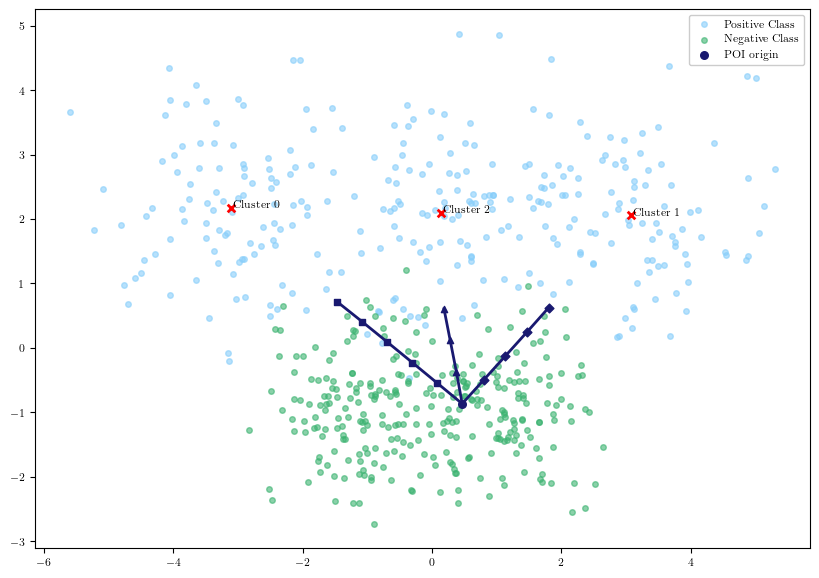

In [76]:
k_directions = 3
mrmc = mrmc_method.MRMC(
    k_directions,
    preprocessor,
    dataset,
    rescale_direction=mrmc_method.get_constant_step_size_rescaler(step_size=0.5))

check_certainty = recourse_iterator.wrap_model(model)

iterator = recourse_iterator.RecourseIterator(
    mrmc,
    preprocessor,
    certainty_cutoff=0.75,
    check_certainty=check_certainty)
paths = iterator.iterate_k_recourse_paths(poi, 20)

fig, ax = Display2DPaths(
    dataset.drop('Y', axis=1).to_numpy(),
    dataset['Y'].to_numpy()
).use_small_legend().set_paths(paths).set_clusters(mrmc.clusters.cluster_centers).scatter()